# HW #5 Practice Worksheet: Animacy

As practice for HW #5, this Python notebook uses NLTK's feature structure syntax to 

## Helper Functions

One of the powers of using a notebook like this is that is essentially an interpreter, so we can treat it like an interactive sandbox, with some helpful visualization tools as well. Let's 

In [28]:
import nltk, re

def init_parser(grammar_str):
    """
    Initialize a feature parser based on the input grammar string.
    """
    grammar = nltk.grammar.FeatureGrammar.fromstring(grammar_str)
    return nltk.parse.FeatureIncrementalChartParser(grammar,trace=1)

def word_tokenize(sent):
    # If you are receiving the "punkt" error, uncomment
    # the following line -- it's not as good a tokenizer
    # but it will function without nltk downloads:
    # return re.split('\s+', sent)
    return nltk.tokenize.word_tokenize(sent)

def init_sents(sent_str):
    """
    Parse in a series of sentences, and their acceptability notation
    as a tuple of (is_valid, sent).
    """
    for sent in [s.strip() for s in sent_str.split('\n') if s.strip()]:
        is_valid = not sent.startswith('*')
        tokens = nltk.tokenize.word_tokenize(re.sub('^\*?\s*', '', sent))
        yield is_valid, tokens

# A few IPython visualization tools
from IPython.core.display import display_html, display_png
def csscolor(s, c): return '<span style="color: {};">{}</span>'.format(c, s)
def html(s): display_html(s, raw=True)
    
def check_coverage(grammar_str, sent_str):
    """
    A helper function to iterate over our defined grammar and sentence key,
    and tell us whether or not we got the answer right for the given sentence.
    
    :type sent_list: list[str]
    """
    ret_str = ''
    parser = init_parser(grammar_str)
    for is_valid, tokens in init_sents(sent_str):
        valid_marker = '' if is_valid else '&#42; '
        sent_repr = '{}{}'.format(valid_marker, ' '.join(tokens))
        
        def sent_error(extra=''):
            html('\u274C &nbsp;' + csscolor(sent_repr + extra, 'red'))
        def sent_success(extra=''):
            html('\u2705 &nbsp;' + csscolor(sent_repr + extra, 'green'))
        try:
            parses = list(parser.parse(tokens))
        except ValueError as ve:
            html('\u274C ' + csscolor(str(ve), 'red'))
            continue
        
        if not parses:
            if is_valid:
                sent_error()
            else:
                sent_success()
        else:
            first_parse = ' {}'.format(parses[0])
            if is_valid:                   
                sent_success(str(parses[0]))
            else:
                sent_error(str(parses[0]))
            # Comment out the following line if you're receiving
            # a "tkinter" error:
            display_png(parses[0])
            
    display_html(ret_str, raw=True)

# Practice

Note that in the sentences below, *"**gifted**,"*  is a ditransitive verb that requires the indirect object to be animate (in my idiolect). 

*(with thanks to Shannon for suggesting it)* — *"**made**,"* on the other hand, does not have such a distinction and can have this requirement left unspecified.



✅   Mary saw herself .(S[]
 (NP[GENDER='fem', NUM='sg'] (PropN[GENDER='fem', NUM='sg'] Mary))
 (VP[GENDER=?g, NUM=?n, TENSE='past']
 (TV[GENDER=?g, TENSE='past'] saw)
 (NP[GENDER='fem', NUM='sg']
 (RefPRP[GENDER='fem', NUM='sg'] herself)))
 (PUNC[] .))

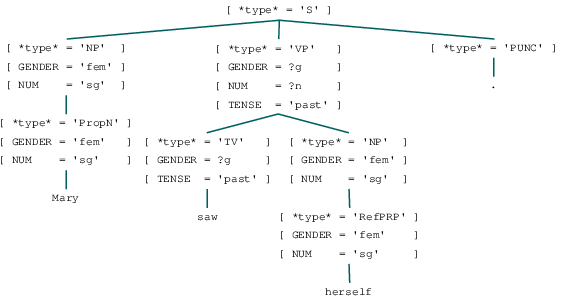

✅   Mary saw himself .(S[]
 (NP[GENDER='fem', NUM='sg'] (PropN[GENDER='fem', NUM='sg'] Mary))
 (VP[GENDER=?g, NUM=?n, TENSE='past']
 (TV[GENDER=?g, TENSE='past'] saw)
 (NP[GENDER='masc', NUM='sg']
 (RefPRP[GENDER='masc', NUM='sg'] himself)))
 (PUNC[] .))

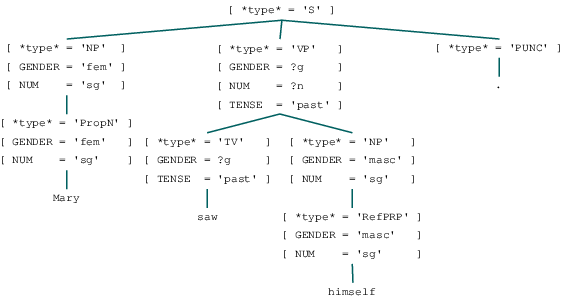

✅   John saw himself .(S[]
 (NP[GENDER='masc', NUM='sg'] (PropN[GENDER='masc', NUM='sg'] John))
 (VP[GENDER=?g, NUM=?n, TENSE='past']
 (TV[GENDER=?g, TENSE='past'] saw)
 (NP[GENDER='masc', NUM='sg']
 (RefPRP[GENDER='masc', NUM='sg'] himself)))
 (PUNC[] .))

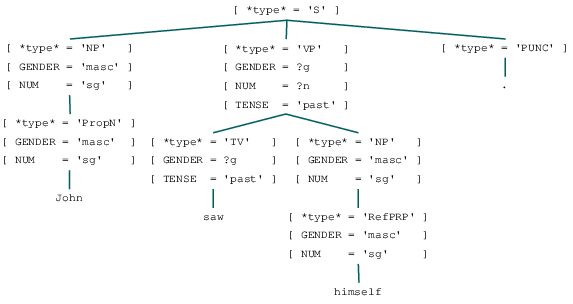

In [9]:
sentences = '''
Mary saw herself .
Mary saw himself .
John saw himself .
'''

grammar='''% start S
# ###################
# Grammar Productions
# ###################

# S expansion productions
S -> NP[NUM=?n, GENDER =?g] VP[NUM=?n, GENDER = ?g] PUNC

# NP expansion productions
NP[NUM=?n] -> N[NUM=?n]
NP[NUM=?n, GENDER=?g] -> PropN[NUM=?n, GENDER=?g]
NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]
NP[NUM=pl] -> N[NUM=pl]
NP[NUM=?n, GENDER=?g] -> RefPRP[NUM=?n, GENDER=?g]

# VP expansion productions
VP[TENSE=?t, NUM=?n] -> IV[TENSE=?t, NUM=?n]
VP[TENSE=?t, NUM=?n, GENDER =?g] -> TV[TENSE=?t, NUM=?n] NP
VP[NUM=?n,SEM=<?pp(?vp)>] -> VP[NUM=?n,SEM=?vp] PP[SEM=?pp]
PP[SEM=<?p(?np)>] -> P[LOC=?l,SEM=?p] NP[LOC=?l,SEM=?np]



# ###################
# Lexical Productions
# ###################

Det[NUM=sg] -> 'this' | 'every'
Det[NUM=pl] -> 'these' | 'all'
Det -> 'the' | 'some' | 'several'

PropN[NUM=sg, GENDER =masc]-> 'John'
PropN[NUM=sg, GENDER =fem]-> 'Mary'
RefPRP[NUM=sg, GENDER =fem] -> 'herself'
RefPRP[NUM=sg, GENDER =masc] -> 'himself'

N[NUM=sg] -> 'dog' | 'girl' | 'car' | 'child' | 'cat' | 'book' | 'shelf'
N[NUM=pl] -> 'dogs' | 'girls' | 'cars' | 'children' | 'cats'

IV[TENSE=pres,  NUM=sg] -> 'disappears' | 'walks' | 'barks'
TV[TENSE=pres, NUM=sg] -> 'sees' | 'likes' | 'puts'

IV[TENSE=pres,  NUM=pl] -> 'disappear' | 'walk' | 'bark'
TV[TENSE=pres, NUM=pl] -> 'see' | 'like' | 'put'

IV[TENSE=past] -> 'disappeared' | 'walked'
TV[TENSE=past, GENDER = ?g] -> 'saw' | 'liked' | 'thought'

PUNC -> '.' | '?'

P[+LOC,SEM=<\X P e.X(\y.(P(e) & in(e,y)))>] -> 'in'
P[+LOC,SEM=<\X P e.X(\y.(P(e) & on(e,y)))>] -> 'on'

NP[AGR=?a] -> Det[AGR=?a] N[AGR=?a]
Det[AGR=[NUM=sg, PER=3]] -> 'this' | 'that'
Det[AGR=[NUM=pl, PER=3]] -> 'these' | 'those'
Det[AGR=[NUM=pl, PER=1]] -> 'we'
Det[AGR=[PER=2]] -> 'you'
'''

check_coverage(grammar, sentences)

✅   Ahmed gifted The The Rock a book(S[]
 (NP[+animacy] (NNP[+animacy] Ahmed))
 (VP[]
 (V[+indobj_animacy] gifted)
 (NP[animacy=?a]
 (NNP[animacy=?n]
 (NNP[animacy=?n]
 (NNP[+animacy] The)
 (NNP_BAR[] (NNP[+animacy] The)))
 (NNP_BAR[] (NNP[+animacy] Rock))))
 (NP[-animacy] (Det[] a) (N[-animacy] book))))

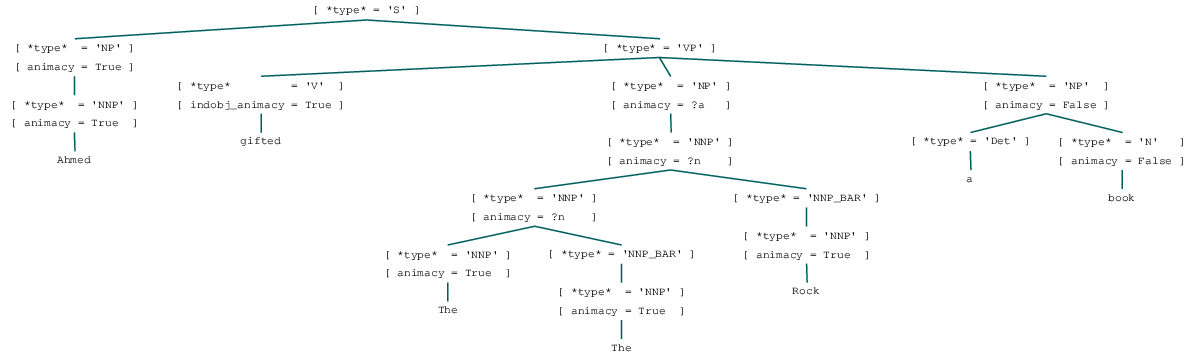

✅   * Ahmed gifted the rock a book

In [16]:
# What can I say, except 'you're welcome'?
dwayne_sentence = '''
Ahmed gifted The The Rock a book
*Ahmed gifted the rock a book
'''

dwayne_grammar = grammar + '''
NNP[animacy=?n] -> NNP NNP_BAR 
NNP_BAR -> NNP
NNP[animacy=True] -> 'The' | 'Rock'
'''

check_coverage(dwayne_grammar, dwayne_sentence)

|.the.dog.bar. . .|
|[---]   .   .   .| [0:1] 'the'
|.   [---]   .   .| [1:2] 'dogs'
|.   .   [---]   .| [2:3] 'bark'
|.   .   .   [---]| [3:4] '.'
|[---]   .   .   .| [0:1] Det[] -> 'the' *
|[--->   .   .   .| [0:1] NP[NUM=?n] -> Det[NUM=?n] * N[NUM=?n] {}
|.   [---]   .   .| [1:2] N[NUM='pl'] -> 'dogs' *
|.   [---]   .   .| [1:2] NP[NUM='pl'] -> N[NUM='pl'] *
|[-------]   .   .| [0:2] NP[NUM='pl'] -> Det[NUM='pl'] N[NUM='pl'] *
|[------->   .   .| [0:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'pl'}
|.   [--->   .   .| [1:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'pl'}
|.   .   [---]   .| [2:3] IV[NUM='pl', TENSE='pres'] -> 'bark' *
|.   .   [---]   .| [2:3] VP[NUM='pl', TENSE='pres'] -> IV[NUM='pl', TENSE='pres'] *
|[----------->   .| [0:3] S[] -> NP[NUM=?n] VP[NUM=?n] * PUNC[] {?n: 'pl'}
|.   [------->   .| [1:3] S[] -> NP[NUM=?n] VP[NUM=?n] * PUNC[] {?n: 'pl'}
|.   .   .   [---]| [3:4] PUNC[] -> '.' *
|[===============]| [0:4] S[] -> NP[NUM='pl'] VP[NUM='pl'] PUNC[] *
|.   [

✅   the dogs bark .(S[]
 (NP[NUM='pl'] (Det[] the) (N[NUM='pl'] dogs))
 (VP[NUM='pl', TENSE='pres'] (IV[NUM='pl', TENSE='pres'] bark))
 (PUNC[] .))

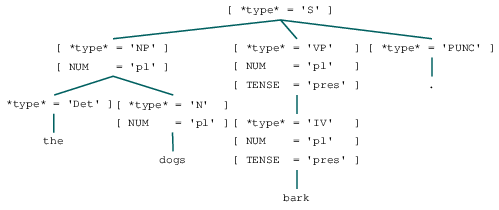

|.the.dog.bar. . .|
|[---]   .   .   .| [0:1] 'the'
|.   [---]   .   .| [1:2] 'dog'
|.   .   [---]   .| [2:3] 'barks'
|.   .   .   [---]| [3:4] '.'
|[---]   .   .   .| [0:1] Det[] -> 'the' *
|[--->   .   .   .| [0:1] NP[NUM=?n] -> Det[NUM=?n] * N[NUM=?n] {}
|.   [---]   .   .| [1:2] N[NUM='sg'] -> 'dog' *
|.   [---]   .   .| [1:2] NP[NUM='sg'] -> N[NUM='sg'] *
|[-------]   .   .| [0:2] NP[NUM='sg'] -> Det[NUM='sg'] N[NUM='sg'] *
|[------->   .   .| [0:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'sg'}
|.   [--->   .   .| [1:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'sg'}
|.   .   [---]   .| [2:3] IV[NUM='sg', TENSE='pres'] -> 'barks' *
|.   .   [---]   .| [2:3] VP[NUM='sg', TENSE='pres'] -> IV[NUM='sg', TENSE='pres'] *
|[----------->   .| [0:3] S[] -> NP[NUM=?n] VP[NUM=?n] * PUNC[] {?n: 'sg'}
|.   [------->   .| [1:3] S[] -> NP[NUM=?n] VP[NUM=?n] * PUNC[] {?n: 'sg'}
|.   .   .   [---]| [3:4] PUNC[] -> '.' *
|[===============]| [0:4] S[] -> NP[NUM='sg'] VP[NUM='sg'] PUNC[] *
|.   [

✅   the dog barks .(S[]
 (NP[NUM='sg'] (Det[] the) (N[NUM='sg'] dog))
 (VP[NUM='sg', TENSE='pres'] (IV[NUM='sg', TENSE='pres'] barks))
 (PUNC[] .))

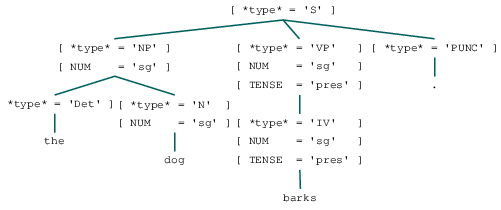

|.the.dog.bar. . .|
|[---]   .   .   .| [0:1] 'the'
|.   [---]   .   .| [1:2] 'dog'
|.   .   [---]   .| [2:3] 'bark'
|.   .   .   [---]| [3:4] '.'
|[---]   .   .   .| [0:1] Det[] -> 'the' *
|[--->   .   .   .| [0:1] NP[NUM=?n] -> Det[NUM=?n] * N[NUM=?n] {}
|.   [---]   .   .| [1:2] N[NUM='sg'] -> 'dog' *
|.   [---]   .   .| [1:2] NP[NUM='sg'] -> N[NUM='sg'] *
|[-------]   .   .| [0:2] NP[NUM='sg'] -> Det[NUM='sg'] N[NUM='sg'] *
|[------->   .   .| [0:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'sg'}
|.   [--->   .   .| [1:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'sg'}
|.   .   [---]   .| [2:3] IV[NUM='pl', TENSE='pres'] -> 'bark' *
|.   .   [---]   .| [2:3] VP[NUM='pl', TENSE='pres'] -> IV[NUM='pl', TENSE='pres'] *
|.   .   .   [---]| [3:4] PUNC[] -> '.' *


❌   the dog bark .

|.the.dog.bar. . .|
|[---]   .   .   .| [0:1] 'the'
|.   [---]   .   .| [1:2] 'dogs'
|.   .   [---]   .| [2:3] 'barks'
|.   .   .   [---]| [3:4] '.'
|[---]   .   .   .| [0:1] Det[] -> 'the' *
|[--->   .   .   .| [0:1] NP[NUM=?n] -> Det[NUM=?n] * N[NUM=?n] {}
|.   [---]   .   .| [1:2] N[NUM='pl'] -> 'dogs' *
|.   [---]   .   .| [1:2] NP[NUM='pl'] -> N[NUM='pl'] *
|[-------]   .   .| [0:2] NP[NUM='pl'] -> Det[NUM='pl'] N[NUM='pl'] *
|[------->   .   .| [0:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'pl'}
|.   [--->   .   .| [1:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'pl'}
|.   .   [---]   .| [2:3] IV[NUM='sg', TENSE='pres'] -> 'barks' *
|.   .   [---]   .| [2:3] VP[NUM='sg', TENSE='pres'] -> IV[NUM='sg', TENSE='pres'] *
|.   .   .   [---]| [3:4] PUNC[] -> '.' *


❌   the dogs barks .

|.dog .bark. .  .|
|[----]    .    .| [0:1] 'dog'
|.    [----]    .| [1:2] 'bark'
|.    .    [----]| [2:3] '.'
|[----]    .    .| [0:1] N[NUM='sg'] -> 'dog' *
|[----]    .    .| [0:1] NP[NUM='sg'] -> N[NUM='sg'] *
|[---->    .    .| [0:1] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'sg'}
|.    [----]    .| [1:2] IV[NUM='pl', TENSE='pres'] -> 'bark' *
|.    [----]    .| [1:2] VP[NUM='pl', TENSE='pres'] -> IV[NUM='pl', TENSE='pres'] *
|.    .    [----]| [2:3] PUNC[] -> '.' *


❌   dog bark .

|.dogs.bark. .  .|
|[----]    .    .| [0:1] 'dogs'
|.    [----]    .| [1:2] 'bark'
|.    .    [----]| [2:3] '.'
|[----]    .    .| [0:1] N[NUM='pl'] -> 'dogs' *
|[----]    .    .| [0:1] NP[NUM='pl'] -> N[NUM='pl'] *
|[---->    .    .| [0:1] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'pl'}
|.    [----]    .| [1:2] IV[NUM='pl', TENSE='pres'] -> 'bark' *
|.    [----]    .| [1:2] VP[NUM='pl', TENSE='pres'] -> IV[NUM='pl', TENSE='pres'] *
|[--------->    .| [0:2] S[] -> NP[NUM=?n] VP[NUM=?n] * PUNC[] {?n: 'pl'}
|.    .    [----]| [2:3] PUNC[] -> '.' *
|[==============]| [0:3] S[] -> NP[NUM='pl'] VP[NUM='pl'] PUNC[] *


✅   dogs bark .(S[]
 (NP[NUM='pl'] (N[NUM='pl'] dogs))
 (VP[NUM='pl', TENSE='pres'] (IV[NUM='pl', TENSE='pres'] bark))
 (PUNC[] .))

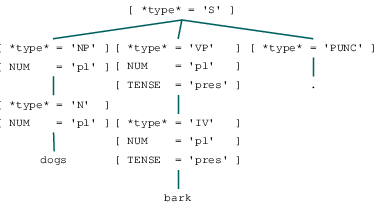

|.t.d.b.t.c...|
|[-] . . . . .| [0:1] 'the'
|. [-] . . . .| [1:2] 'dogs'
|. . [-] . . .| [2:3] 'bark'
|. . . [-] . .| [3:4] 'the'
|. . . . [-] .| [4:5] 'cats'
|. . . . . [-]| [5:6] '.'
|[-] . . . . .| [0:1] Det[] -> 'the' *
|[-> . . . . .| [0:1] NP[NUM=?n] -> Det[NUM=?n] * N[NUM=?n] {}
|. [-] . . . .| [1:2] N[NUM='pl'] -> 'dogs' *
|. [-] . . . .| [1:2] NP[NUM='pl'] -> N[NUM='pl'] *
|[---] . . . .| [0:2] NP[NUM='pl'] -> Det[NUM='pl'] N[NUM='pl'] *
|[---> . . . .| [0:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'pl'}
|. [-> . . . .| [1:2] S[] -> NP[NUM=?n] * VP[NUM=?n] PUNC[] {?n: 'pl'}
|. . [-] . . .| [2:3] IV[NUM='pl', TENSE='pres'] -> 'bark' *
|. . [-] . . .| [2:3] VP[NUM='pl', TENSE='pres'] -> IV[NUM='pl', TENSE='pres'] *
|[-----> . . .| [0:3] S[] -> NP[NUM=?n] VP[NUM=?n] * PUNC[] {?n: 'pl'}
|. [---> . . .| [1:3] S[] -> NP[NUM=?n] VP[NUM=?n] * PUNC[] {?n: 'pl'}
|. . . [-] . .| [3:4] Det[] -> 'the' *
|. . . [-> . .| [3:4] NP[NUM=?n] -> Det[NUM=?n] * N[NUM=?n] {}
|. . . . [-] .| [4:5]

❌   the dogs bark the cats .

In [29]:
sentences = '''
the dogs bark .
the dog barks .
the dog bark .
the dogs barks .
dog bark .
dogs bark .
the dogs bark the cats .
'''

grammar='''% start S
# ###################
# Grammar Productions
# ###################

# S expansion productions
S -> NP[NUM=?n] VP[NUM=?n] PUNC

# NP expansion productions
NP[NUM=?n] -> N[NUM=?n]
NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]


# VP expansion productions
VP[TENSE=?t, NUM=?n] -> IV[TENSE=?t, NUM=?n]

# ###################
# Lexical Productions
# ###################


Det -> 'the' 


N[NUM=sg] -> 'dog' 
N[NUM=pl] -> 'dogs' | 'cats'
IV[TENSE=pres,  NUM=sg] ->  'barks'
IV[TENSE=pres,  NUM=pl] -> 'bark'

PUNC -> '.' | '?'

'''

check_coverage(grammar, sentences)

❌   Mary put the book .

✅   Mary put the book on the shelf .(S[SEM= ]
 (NP[-LOC, NUM='sg', SEM=<\P.P(mary)>]
 (PropN[-LOC, NUM='sg', SEM=<\P.P(mary)>] Mary))
 (VP[NUM='sg', SEM=<\x.exists z4.(shelf(z4) & exists z3.(book(z3) & put(x,z3,z4)))>]
 (DTV[NUM='sg', SEM=<\Y X x.X(\z.Y(\y.put(x,y,z)))>, TNS='pres']
 put)
 (NP[NUM='sg', SEM=<\Q.exists x.(book(x) & Q(x))>]
 (Det[NUM='sg', SEM=<\P Q.exists x.(P(x) & Q(x))>] the)
 (Nom[NUM='sg', SEM=<\x.book(x)>]
 (N[NUM='sg', SEM=<\x.book(x)>] book)))
 (PP[+ON, SEM=<\Q.exists x.(shelf(x) & Q(x))>]
 (P[+on] on)
 (NP[NUM='sg', SEM=<\Q.exists x.(shelf(x) & Q(x))>]
 (Det[NUM='sg', SEM=<\P Q.exists x.(P(x) & Q(x))>] the)
 (Nom[NUM='sg', SEM=<\x.shelf(x)>]
 (N[NUM='sg', SEM=<\x.shelf(x)>] shelf)))))
 (PUNC[] .))

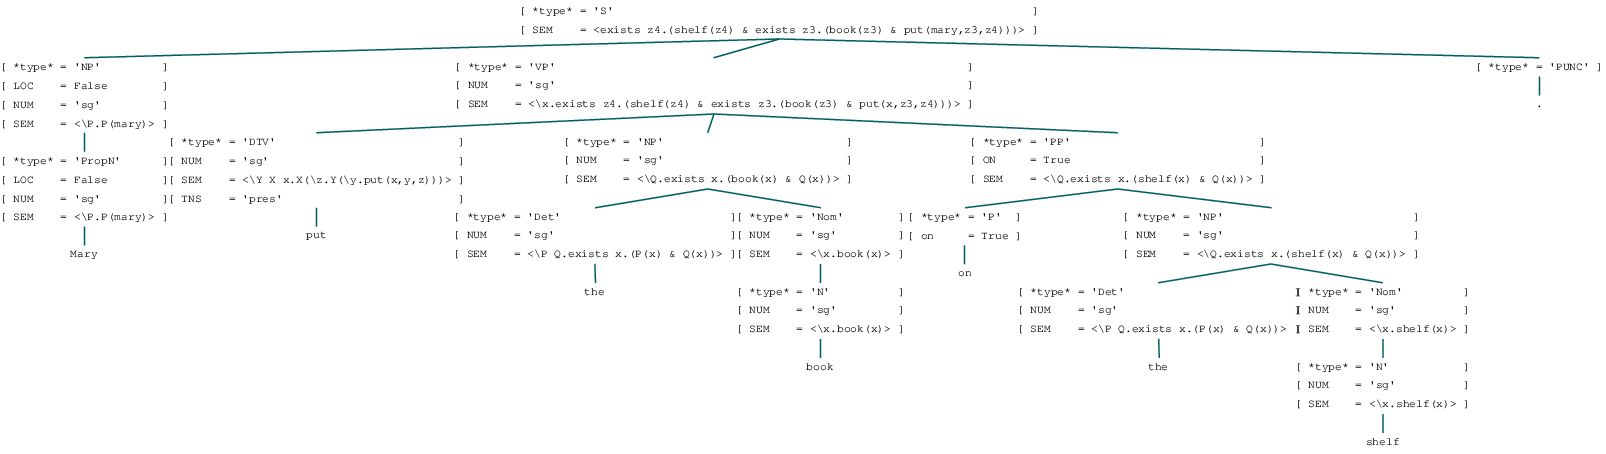

In [15]:
sentences = '''
Mary put the book .
Mary put the book on the shelf .
'''

grammar='''

% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp] PUNC

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+ON,SEM=?pp]

PP[+ON, SEM=?np] -> P[+ON] NP[SEM=?np]



#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(mary)>] -> 'Mary'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'the'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.put(x,y,z)))>,TNS=pres] -> 'put'
P[+on] -> 'on'
N[NUM=sg,SEM=<\\x.book(x)>] -> 'book'
N[NUM=sg,SEM=<\\x.shelf(x)>] -> 'shelf'
PUNC -> '.'

'''

check_coverage(grammar, sentences)

In [16]:
text = nltk.word_tokenize("Did Mary put the book on the shelf")
print(nltk.pos_tag(text))

[('Did', 'NNP'), ('Mary', 'NNP'), ('put', 'VBD'), ('the', 'DT'), ('book', 'NN'), ('on', 'IN'), ('the', 'DT'), ('shelf', 'NN')]


In [30]:
sentences = '''
what did Mary put on the shelf ?
'''

grammar='''

% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp] PUNC
S[] -> V[+AUX] NP VP PUNC
S[-INV] -> NP[+WH] S/NP
S[+INV]/?x -> V[+AUX] NP VP/?x PUNC

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+ON,SEM=?pp]

VP[NUM=?n,SEM=<?v(?obj,?pp)>]/?x -> V[SUBCAT=trans, -AUX] NP/?x PP[+ON,SEM=?pp]

PP[+ON, SEM=?np] -> P[+ON] NP[SEM=?np]




#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(mary)>] -> 'Mary'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'the'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.put(x,y,z)))>,TNS=pres] -> 'put'
P[+on] -> 'on'
N[NUM=sg,SEM=<\\x.book(x)>] -> 'book'
N[NUM=sg,SEM=<\\x.shelf(x)>] -> 'shelf'
PUNC -> '.' | '?'
V[+AUX] -> 'did'
NP[+WH,SEM=<\\x.what(x)>] -> 'what' | 'who'

'''

check_coverage(grammar, sentences)

|.w.d.M.p.o.t.s.?.|
|[-] . . . . . . .| [0:1] 'what'
|. [-] . . . . . .| [1:2] 'did'
|. . [-] . . . . .| [2:3] 'Mary'
|. . . [-] . . . .| [3:4] 'put'
|. . . . [-] . . .| [4:5] 'on'
|. . . . . [-] . .| [5:6] 'the'
|. . . . . . [-] .| [6:7] 'shelf'
|. . . . . . . [-]| [7:8] '?'
|[-] . . . . . . .| [0:1] NP[SEM=<\x.what(x)>, +WH] -> 'what' *
|[-> . . . . . . .| [0:1] S[SEM=<?subj(?vp)>] -> NP[NUM=?n, SEM=?subj] * VP[NUM=?n, SEM=?vp] PUNC[] {?subj: <LambdaExpression \x.what(x)>}
|[-> . . . . . . .| [0:1] S[-INV] -> NP[+WH] * S[]/NP[] {}
|. [-] . . . . . .| [1:2] V[+AUX] -> 'did' *
|. [-> . . . . . .| [1:2] S[] -> V[+AUX] * NP[] VP[] PUNC[] {}
|. [-> . . . . . .| [1:2] S[+INV]/?x[] -> V[+AUX] * NP[] VP[]/?x[] PUNC[] {}
|. . [-] . . . . .| [2:3] PropN[-LOC, NUM='sg', SEM=<\P.P(mary)>] -> 'Mary' *
|. . [-] . . . . .| [2:3] NP[-LOC, NUM='sg', SEM=<\P.P(mary)>] -> PropN[-LOC, NUM='sg', SEM=<\P.P(mary)>] *
|. . [-> . . . . .| [2:3] S[SEM=<?subj(?vp)>] -> NP[NUM=?n, SEM=?subj] * VP[NUM=?n, SEM=?v

❌   what did Mary put on the shelf ?

✅   who do you claim that you like(S[-INV]
 (NP[+WH] who)
 (S[+INV]/NP[]
 (V[+AUX] do)
 (NP[-WH] you)
 (VP[]/NP[]
 (V[-AUX, SUBCAT='clause'] claim)
 (SBar[]/NP[]
 (Comp[] that)
 (S[-INV]/NP[]
 (NP[-WH] you)
 (VP[]/NP[] (V[-AUX, SUBCAT='trans'] like) (NP[]/NP[] )))))))

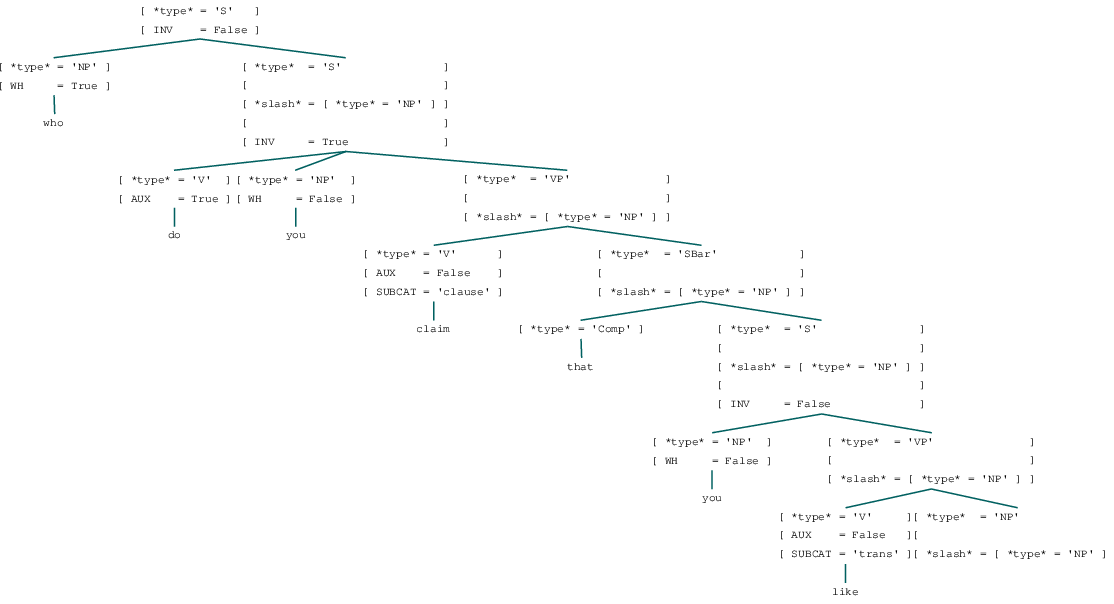

In [25]:
sentences = '''
who do you claim that you like
'''

grammar='''

## Natural Language Toolkit: feat1.fcfg
##
## Second example of a feature-based grammar, illustrating
## SUBCAT and slash features. Also introduces SBar and embedded
## clauses.
## Used in Feature-Based Grammars chapter.
## 
## Author: Ewan Klein <ewan@inf.ed.ac.uk> 
## URL: <http://nltk.sourceforge.net>
## For license information, see LICENSE.TXT

% start S
# ###################
# Grammar Productions
# ###################

S[-INV] -> NP VP
S[-INV]/?x -> NP VP/?x

S[-INV] -> NP S/NP
S[-INV] -> Adv[+NEG] S[+INV]

S[+INV] -> V[+AUX] NP VP
S[+INV]/?x -> V[+AUX] NP VP/?x

SBar -> Comp S[-INV]
SBar/?x -> Comp S[-INV]/?x

VP -> V[SUBCAT=intrans, -AUX]

VP -> V[SUBCAT=trans, -AUX] NP
VP/?x -> V[SUBCAT=trans, -AUX] NP/?x

VP -> V[SUBCAT=clause, -AUX] SBar
VP/?x -> V[SUBCAT=clause, -AUX] SBar/?x

VP -> V[+AUX] VP
VP/?x -> V[+AUX] VP/?x

# ###################
# Lexical Productions
# ###################
V[SUBCAT=intrans, -AUX] -> 'walk' | 'sing'
V[SUBCAT=trans, -AUX] -> 'see' | 'like'
V[SUBCAT=clause, -AUX] -> 'say' | 'claim'
V[+AUX] -> 'do' | 'can'

NP[-WH] -> 'you' | 'cats'
NP[+WH] -> 'who'

Adv[+NEG] -> 'rarely' | 'never'

NP/NP ->

Comp -> 'that'


'''

check_coverage(grammar, sentences)

|.Mary.saw .hers.|
|[----]    .    .| [0:1] 'Mary'
|.    [----]    .| [1:2] 'saw'
|.    .    [----]| [2:3] 'herself'
|[----]    .    .| [0:1] NP[sem='Gender = "fem"'] -> 'Mary' *
|[---->    .    .| [0:1] S[sem=(?np+?vp)] -> NP[sem=?np] * VP[sem=?vp] {?np: 'Gender = "fem"'}
|.    [----]    .| [1:2] TV[sem='WHAT'] -> 'saw' *
|.    [---->    .| [1:2] VP[sem=(?v+?np)] -> TV[sem=?v] * NP[sem=?np] {?v: 'WHAT'}
|.    .    [----]| [2:3] NP[sem='Gender = "fem"'] -> 'herself' *
|.    .    [---->| [2:3] S[sem=(?np+?vp)] -> NP[sem=?np] * VP[sem=?vp] {?np: 'Gender = "fem"'}
|.    [---------]| [1:3] VP[sem=(WHAT, Gender = "fem")] -> TV[sem='WHAT'] NP[sem='Gender = "fem"'] *
|[==============]| [0:3] S[sem=(Gender = "fem", WHAT, Gender = "fem")] -> NP[sem='Gender = "fem"'] VP[sem=(WHAT, Gender = "fem")] *


✅   Mary saw herself(S[sem=(Gender = "fem", WHAT, Gender = "fem")]
 (NP[sem='Gender = "fem"'] Mary)
 (VP[sem=(WHAT, Gender = "fem")]
 (TV[sem='WHAT'] saw)
 (NP[sem='Gender = "fem"'] herself)))

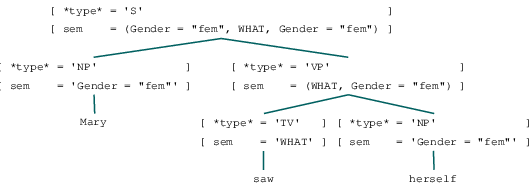

|.Mary.saw .hims.|
|[----]    .    .| [0:1] 'Mary'
|.    [----]    .| [1:2] 'saw'
|.    .    [----]| [2:3] 'himself'
|[----]    .    .| [0:1] NP[sem='Gender = "fem"'] -> 'Mary' *
|[---->    .    .| [0:1] S[sem=(?np+?vp)] -> NP[sem=?np] * VP[sem=?vp] {?np: 'Gender = "fem"'}
|.    [----]    .| [1:2] TV[sem='WHAT'] -> 'saw' *
|.    [---->    .| [1:2] VP[sem=(?v+?np)] -> TV[sem=?v] * NP[sem=?np] {?v: 'WHAT'}
|.    .    [----]| [2:3] NP[sem='Gender = "masc"'] -> 'himself' *
|.    .    [---->| [2:3] S[sem=(?np+?vp)] -> NP[sem=?np] * VP[sem=?vp] {?np: 'Gender = "masc"'}
|.    [---------]| [1:3] VP[sem=(WHAT, Gender = "masc")] -> TV[sem='WHAT'] NP[sem='Gender = "masc"'] *
|[==============]| [0:3] S[sem=(Gender = "fem", WHAT, Gender = "masc")] -> NP[sem='Gender = "fem"'] VP[sem=(WHAT, Gender = "masc")] *


✅   Mary saw himself(S[sem=(Gender = "fem", WHAT, Gender = "masc")]
 (NP[sem='Gender = "fem"'] Mary)
 (VP[sem=(WHAT, Gender = "masc")]
 (TV[sem='WHAT'] saw)
 (NP[sem='Gender = "masc"'] himself)))

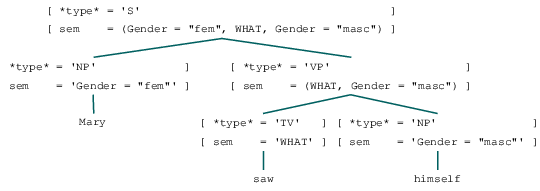

In [32]:
sentences = '''
Mary saw herself 
Mary saw himself 
'''

grammar='''

% start S

S[sem=(?np + ?vp)] -> NP[sem=?np] VP[sem=?vp]
VP[sem=(?v + ?np)] -> TV[sem=?v] NP[sem=?np]
NP[sem='Gender = "fem"'] -> 'Mary'
NP[sem='Gender = "fem"'] -> 'herself'
NP[sem='Gender = "masc"'] -> 'himself'

TV[sem='WHAT'] -> 'saw'

'''
check_coverage(grammar, sentences)